In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [3]:
warnings.filterwarnings("ignore")

In [4]:
np.random.seed(1)

In [5]:
df = pd.DataFrame({
    'x1': np.random.normal(loc=0, scale=2, size=10000),
    'x2': np.random.normal(loc=5, scale=3, size=10000),
    'x3': np.random.normal(loc=-5, scale=5, size=10000)
})
df.head()

,x1,x2,x3
0,3.248691,4.632578,-14.657819
1,-1.223513,5.684509,-5.802131
2,-1.056344,3.943085,-9.161098
3,-2.145937,2.508340,-6.030558
4,1.730815,4.216731,0.131275


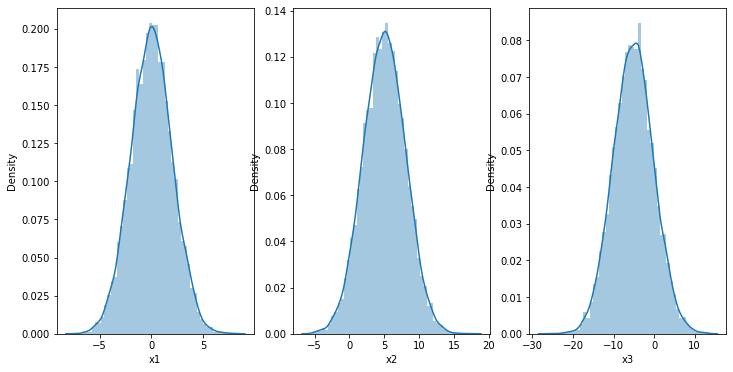

In [6]:
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
sns.distplot(df['x1'])
plt.subplot(1,3,2)
sns.distplot(df['x2'])
plt.subplot(1,3,3)
sns.distplot(df['x3'])
plt.show()


In [7]:
df['x1'].skew(), df['x2'].skew(), df['x3'].skew()

(0.024908307683156897, -0.013403357762784509, 0.028219538575913014)

In [8]:
df['x1'].mean(), df['x2'].mean(), df['x3'].mean()

(0.01954531339820994, 5.028306240341306, -5.073017604310101)

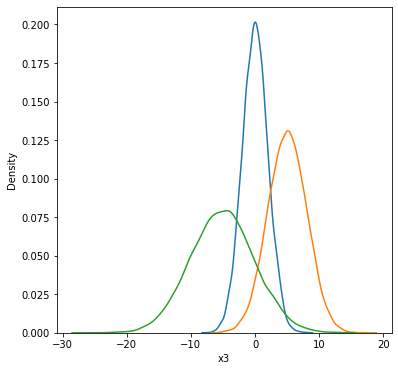

In [10]:
f, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(6,6))
sns.distplot(df['x1'], ax=ax1, hist=False)
sns.distplot(df['x2'], ax=ax1, hist=False)
sns.distplot(df['x3'], ax=ax1, hist=False)
plt.show()

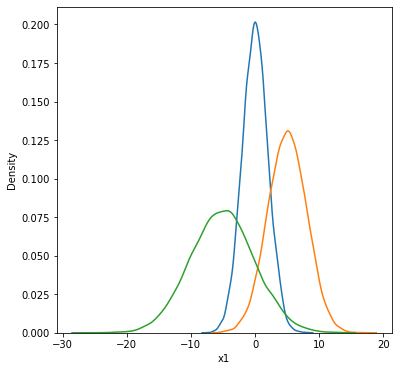

In [11]:
f, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(6,6))
sns.kdeplot(df['x1'], ax=ax1)
sns.kdeplot(df['x2'], ax=ax1)
sns.kdeplot(df['x3'], ax=ax1)
plt.show()

In [12]:
# 3 thuộc tích x1, x2 và x3 có sự chênh lệch về độ lớn -> cần chuẩn hóa 
# do 3 thuộc tính đều có dạng phân phối chuẩn (sấp xỉ chuẩn) -> StandarScaler

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
#khởi tạo đối tượng Scaler
scaler = StandardScaler()

In [15]:
# scale dữ liệu trên tập 3 thuộc tính x1, x2 và x3
df_scale = scaler.fit_transform(df)
df_scale

array([[ 1.61653543, -0.13175263, -1.9247574 ],
       [-0.62228462,  0.21847458, -0.14641572],
       [-0.53859835, -0.36131085, -0.82094159],
       ...,
       [-1.02516118,  2.39614871, -0.06951623],
       [-0.07255698,  0.87231272, -1.27409225],
       [-1.44940235, -0.10890221,  0.35836759]])

In [16]:
# chuyển df_scale về dạng DataFrame
df_scale = pd.DataFrame(df_scale, columns = df.columns)
df_scale.head()

,x1,x2,x3
0,1.616535,-0.131753,-1.924757
1,-0.622285,0.218475,-0.146416
2,-0.538598,-0.361311,-0.820942
3,-1.084057,-0.838991,-0.192287
4,0.856675,-0.270204,1.045092


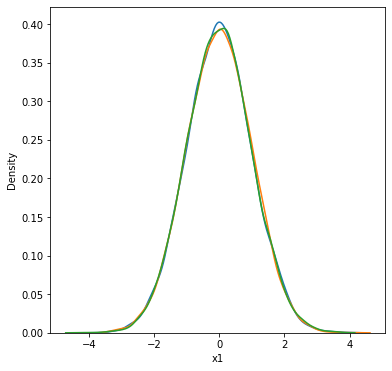

In [17]:
f, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(6,6))
sns.kdeplot(df_scale['x1'], ax=ax1)
sns.kdeplot(df_scale['x2'], ax=ax1)
sns.kdeplot(df_scale['x3'], ax=ax1)
plt.show()

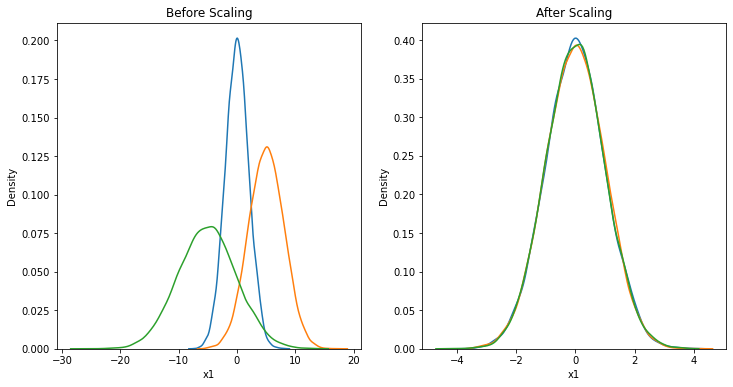

In [18]:
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
sns.kdeplot(df['x1'], ax=ax1)
sns.kdeplot(df['x2'], ax=ax1)
sns.kdeplot(df['x3'], ax=ax1)
ax1.set_title('Before Scaling')

sns.kdeplot(df_scale['x1'], ax=ax2)
sns.kdeplot(df_scale['x2'], ax=ax2)
sns.kdeplot(df_scale['x3'], ax=ax2)
ax2.set_title('After Scaling')
plt.show()

In [19]:
print('Before Scaling:')
print('x1 mean:', df['x1'].mean(), '- x1 std:', df['x1'].std())
print('x2 mean:', df['x2'].mean(), '- x2 std:', df['x2'].std())
print('x3 mean:', df['x3'].mean(), '- x3 std:', df['x3'].std())

Before Scaling:
x1 mean: 0.01954531339820994 - x1 std: 1.9976715734519839
x2 mean: 5.028306240341306 - x2 std: 3.00371800917612
x3 mean: -5.073017604310101 - x3 std: 4.979994430298162


In [20]:
print('After Scaling:')
print('x1 mean:', df_scale['x1'].mean(), '- x1 std:', df_scale['x1'].std())
print('x2 mean:', df_scale['x2'].mean(), '- x2 std:', df_scale['x2'].std())
print('x3 mean:', df_scale['x3'].mean(), '- x3 std:', df_scale['x3'].std())

After Scaling:
x1 mean: 0.0 - x1 std: 1.0000500037503124
x2 mean: 2.447819724693545e-16 - x2 std: 1.0000500037503124
x3 mean: 1.7976731214730534e-16 - x3 std: 1.0000500037503124


In [21]:
print('Before scaling:')
df.corr()

Before scaling:


,x1,x2,x3
x1,1.000000,0.015684,0.006019
x2,0.015684,1.000000,0.003686
x3,0.006019,0.003686,1.000000


In [22]:
print('After scaling:')
df_scale.corr()

After scaling:


,x1,x2,x3
x1,1.000000,0.015684,0.006019
x2,0.015684,1.000000,0.003686
x3,0.006019,0.003686,1.000000
